In [20]:
def WageGrowthTracker() -> str:
    """
    Returns a link to solutions on GitHub.
    """
    return "https://www.atlantafed.org/chcs/wage-growth-tracker"

print(WageGrowthTracker())


https://www.atlantafed.org/chcs/wage-growth-tracker


In [21]:
import requests
import pandas as pd
import datetime as dt
import numpy as np
import statsmodels.api as sm


# Just for jupyter notebook - so I can avoid having to see big warning
#   Note: if you want to disable and see warnings, see Zach's cells Q1 and 
#   comment out 'warnings.filterwarnings('ignore')'
import warnings

In [22]:
# Download and save the Excel file
url = 'https://www.atlantafed.org/-/media/documents/datafiles/chcs/wage-growth-tracker/wage-growth-data.xlsx'
with open('wage_growth_data.xlsx', 'wb') as file:
    file.write(requests.get(url).content)

# List of sheet names on Wage Growth excel sheet
sheet_names = [
    'Education', 'Age', 'Sex', 'Occupation', 'Industry', 'Census Divisions',
    'Full-Time or Part-Time', 'Job Switcher', 'MSA or non-MSA', 
    'Average Wage Quartile', 'Paid Hourly', 'Overall 12ma', 'data_overall'
]

# Function to read sheets with different skiprows parameters
#skip first row for data_overall tab, skip 2 rows on all other tabs
def read_sheet(sheet):
    skiprows = 1 if sheet == 'data_overall' else 2
    return pd.read_excel('wage_growth_data.xlsx', sheet_name=sheet, skiprows=skiprows)

# Merge sheets
merged_df = pd.concat([read_sheet(sheet) for sheet in sheet_names], axis=1)

# Save to a CSV file
merged_df.to_csv('wageGrowth.csv', index=False)


In [23]:
# Display the Wage Growth Data Set
merged_df = pd.read_csv('wageGrowth.csv')

merged_df.head()


,Unnamed: 0,High school of less,Associates degree,Bachelors degree or higher,Overall,Unnamed: 0.1,16-24,25-54,55+,Overall.1,...,Male.1,Job Stayer.1,Job Switcher.1,Paid Hourly.1,Overall: Weighted.1,Overall: Weighted 97.1,Overall: Weekly Basis,Overall: 25/20 trimmed mean,Lower 1/2 of wage distn,Upper 1/2 of wage distn
0,1997-01-01,.,.,.,.,1997-01-01,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
1,1997-02-01,.,.,.,.,1997-02-01,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
2,1997-03-01,.,.,.,.,1997-03-01,.,.,.,.,...,4.4,4.1,5.2,4.2,4.9,4.9,4.8,4.5,4.8,4.2
3,1997-04-01,.,.,.,.,1997-04-01,.,.,.,.,...,4.6,4.1,5.4,4.3,5,5,4.9,4.5,4.9,4.2
4,1997-05-01,.,.,.,.,1997-05-01,.,.,.,.,...,4.5,4.1,5.4,4.1,4.9,5,4.8,4.4,5,4.1


In [24]:
# Employmrent rate (not in final data set right now) 
url = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=LREM64TTUSM156S&scale=left&cosd=1977-01-01&coed=2024-04-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-05-22&revision_date=2024-05-22&nd=1977-01-01"

df = pd.read_csv(url)

#Rename the second column to be more clear
df = df.rename(columns={df.columns[1]: 'Employment_Rate'})
df = df.rename(columns={df.columns[0]: 'Date'})

df.to_csv('Employment_Rate.csv', index=False)

In [25]:
# Load data
minimumWage_Party = pd.read_csv('MinWage_PartyControl.csv').iloc[:, :6]
minimumWage = pd.read_csv('MinimumWage.csv')
selected_columns = minimumWage[['Year', 'GDP_AnnualGrowth']]  # Assuming 'Year' is already a column, not needing reset_index()

# Merge the datasets
merged_df = pd.merge(minimumWage_Party, selected_columns, on='Year', how='inner')
filtered_df = merged_df[merged_df['Year'] > 1976]

# Generate a DataFrame with all months for each year
dates = pd.date_range(start=f"{filtered_df['Year'].min()}-01-01", end=f"{filtered_df['Year'].max()}-12-31", freq='MS')
dates_df = pd.DataFrame({'Date': dates})

# Merge the dates with the filtered DataFrame based on the year
filtered_df = filtered_df.merge(dates_df, left_on='Year', right_on=dates_df['Date'].dt.year)

# Reorder to make 'Date' the first column and rename it
filtered_df.drop(columns=['Year'], inplace=True)
filtered_df['Year'] = filtered_df['Date'].dt.year  # Recreate 'Year' if needed elsewhere
filtered_df = filtered_df[['Date'] + [col for col in filtered_df.columns if col != 'Date']]

# Save the final DataFrame
filtered_df.to_csv('mergedMinimumWageData.csv', index=False)

# Output the head of the final DataFrame to verify
print(filtered_df.head())


        Date PresParty  SenParty HouseParty TrifectaFlag FedMinWage  \
0 1977-01-01  Democrat  Democrat   Democrat     Democrat      $2.30   
1 1977-02-01  Democrat  Democrat   Democrat     Democrat      $2.30   
2 1977-03-01  Democrat  Democrat   Democrat     Democrat      $2.30   
3 1977-04-01  Democrat  Democrat   Democrat     Democrat      $2.30   
4 1977-05-01  Democrat  Democrat   Democrat     Democrat      $2.30   

  GDP_AnnualGrowth  Year  
0            4.60%  1977  
1            4.60%  1977  
2            4.60%  1977  
3            4.60%  1977  
4            4.60%  1977  


In [26]:
# URL of the dataset
url = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1138&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=IR3TIB01USM156N&scale=left&cosd=1964-06-01&coed=2024-04-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-05-20&revision_date=2024-05-20&nd=1964-06-01"

df = pd.read_csv(url)

#Rename the second column to be more clear
df.columns.values[1] = '3MonthInterestRate'

df.to_csv('3-Month Interest Rates', index=False)

In [27]:
# Display the 3 Month Interest Rates data sheet

InterestRates = pd.read_csv('3-Month Interest Rates')

InterestRates.head()

,DATE,3MonthInterestRate
0,1964-06-01,3.86
1,1964-07-01,3.87
2,1964-08-01,3.85
3,1964-09-01,3.87
4,1964-10-01,3.94


In [28]:
# read in cpi csv
cpi = pd.read_csv('cpi.csv')

# omit first column
cpi = cpi.iloc[:, 1:]

# allows us to drop converting string to int type
cpi['Year'] = cpi['Year'].astype(int)

# sets year as index
cpi = cpi.set_index("Year")

# drops all unnecessary years and columns
cpi = cpi.drop(index = range(1913, 1996))
cpi = cpi.drop(columns = ["Avg", "Dec-Dec", "Avg-Avg"])

# 27 rows by 15 columns

# use melt function from pandas to transform cpi df
cpi_melted = cpi.reset_index().melt(id_vars='Year', var_name='Month', value_name='CPI')
month_designation = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'June': '06',
                     'July': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'}
cpi_melted['Month'] = cpi_melted['Month'].map(month_designation)
cpi_melted['Date'] = pd.to_datetime(cpi_melted['Year'].astype(str) + '-' + cpi_melted['Month'] + '-01')
cpi_melted = cpi_melted.drop(columns=['Year', 'Month'])
cpi_melted = cpi_melted.set_index('Date')
cpi_melted = cpi_melted.sort_values('Date')

# only include dates applicable to original df
new_cpi = cpi_melted[cpi_melted.index < '2024-04-01']

new_cpi.to_csv('new_cpi.csv')


In [29]:
#Nomrlaize CPI data above to be month over month, then creating a new datafram with only date and month over month claculations

new_cpi = pd.read_csv('new_cpi.csv')

# Calculate the month-over-month percentage change
new_cpi['MoM Change'] = new_cpi['CPI'].pct_change() * 100

print(new_cpi)

selected_columns = new_cpi.reset_index()[['Date', 'MoM Change']]

# Save the resulting DataFrame to a new CSV file
selected_columns.to_csv('CPI_Month_Over_Month_Changes.csv', index=False)

# Print the resulting DataFrame
print(selected_columns)

           Date      CPI  MoM Change
0    1996-01-01  154.400         NaN
1    1996-02-01  154.900    0.323834
2    1996-03-01  155.700    0.516462
3    1996-04-01  156.300    0.385356
4    1996-05-01  156.600    0.191939
..          ...      ...         ...
334  2023-11-01  307.051   -0.201514
335  2023-12-01  306.746   -0.099332
336  2024-01-01  308.417    0.544750
337  2024-02-01  310.326    0.618967
338  2024-03-01  312.332    0.646417

[339 rows x 3 columns]
           Date  MoM Change
0    1996-01-01         NaN
1    1996-02-01    0.323834
2    1996-03-01    0.516462
3    1996-04-01    0.385356
4    1996-05-01    0.191939
..          ...         ...
334  2023-11-01   -0.201514
335  2023-12-01   -0.099332
336  2024-01-01    0.544750
337  2024-02-01    0.618967
338  2024-03-01    0.646417

[339 rows x 2 columns]


In [30]:
# Load and filter the large DataFrame
merged_df = pd.read_csv('wageGrowth.csv', parse_dates=[0])
filtered_df = merged_df[merged_df.iloc[:, 0] > '1997-12-01']
filtered_df.columns = ['Date'] + list(filtered_df.columns[1:])  # Rename the first column

# Load and filter the 3-month interest rates DataFrame
InterestRates = pd.read_csv('3-Month Interest Rates', parse_dates=[0])
filtered_InterestRates = InterestRates[InterestRates.iloc[:, 0] > '1997-12-01']
filtered_InterestRates.columns = ['Date'] + list(filtered_InterestRates.columns[1:])  # Rename the first column

# Ensure that both 'Date' columns are in the datetime64[ns] format
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])
filtered_InterestRates['Date'] = pd.to_datetime(filtered_InterestRates['Date'])

# Merge the two filtered DataFrames on the "Date" column
merged_final_df = pd.merge(filtered_df, filtered_InterestRates, on='Date')

# Save the merged DataFrame to a new CSV file
merged_final_df.to_csv('merged_filtered_data.csv', index=False)


C:\Users\danny\AppData\Local\Temp\ipykernel_19512\4260192321.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])
C:\Users\danny\AppData\Local\Temp\ipykernel_19512\4260192321.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_InterestRates['Date'] = pd.to_datetime(filtered_InterestRates['Date'])


In [31]:
import pandas as pd

# Load initial merged and filtered data
finalData = pd.read_csv('merged_filtered_data.csv')

# Drop any 'Unnamed' columns that might be there due to indexing
for i in range(13):
    finalData = finalData.drop(columns=f"Unnamed: 0.{i}", errors='ignore')

# Read in the new CPI data and merge
newcpi = pd.read_csv('CPI_Month_Over_Month_Changes.csv')
finalData = finalData.merge(newcpi, how='right', on='Date')

# Read in the employment rate data and merge
emplyRate = pd.read_csv('Employment_Rate.csv')
finalData = finalData.merge(emplyRate, how='right', on='Date')

# Read in the minimum wage data and merge
minimumWage = pd.read_csv('mergedMinimumWageData.csv')
finalData = finalData.merge(minimumWage, how='left', on='Date')

# Save the final merged DataFrame to a new CSV file
finalData.to_csv('finalData.csv', index=False)

# Print the final merged DataFrame to verify the results
print(finalData.head())


PermissionError: [Errno 13] Permission denied: 'finalData.csv'

Zach's Exploratory Data Analysis:

I'm going to look at the relationships between a handful of variables and how 
they change over time, to get a better sense for the data we are working with.

In [ ]:
warnings.filterwarnings('ignore')

# Packages needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Question 1:<br/>
<br/>
How did wage changes differ by certain divisions of people?<br/>
a.) Male vs. Female<br/>
b.) Income Quartiles<br/>
c.) Mostly Full-Time Workers vs. Mostly Part-Time Workers<br/>

In [ ]:
def plot_changes_by_groups(data: pd.DataFrame) -> tuple:
    """
    docstring
    """
    # Formatting data to what I need
    cols_list = ['Date', 'Year', 'Overall', 'Male', 'Female', 
                 'Lowest quartile of wage distribution',
                 '2nd quartile of wage distribution', 
                 '3rd quartile of wage distribution',
                 'Highest quartile of wage distribution',
                 'Usually Full-time', 'Usually Part-time']
    df = data[cols_list]

    # Visualization A - Difference in wage changes between males and females
    
    

In [39]:
#Converting datatypes to float to work with OLS 


data = pd.read_csv('finalData.csv')

# Convert the '3MonthInterestRate' column to string type
data['3MonthInterestRate'] = data['3MonthInterestRate'].astype(str)

# Remove decimal points only when there is no number before or after it
data['3MonthInterestRate'] = data['3MonthInterestRate'].str.replace(r'(?<!\d)\.|\.(?!\d)', '', regex=True)

# Replace blanks with '0'
data['3MonthInterestRate'] = data['3MonthInterestRate'].replace('', '0')

# Convert the column to float
data['3MonthInterestRate'] = data['3MonthInterestRate'].astype(float)

# Correctly remove dollar signs from 'FedMinWage' and convert to float
data['FedMinWage'] = data['FedMinWage'].str.replace('$', '').astype(float)

# Correctly remove percent signs from 'GDP_AnnualGrowth', convert to float, and adjust for percentage representation
data['GDP_AnnualGrowth'] = data['GDP_AnnualGrowth'].str.replace('%', '').astype(float) / 100

# Display the corrected data types to ensure the operations were successful
print(data[['FedMinWage', 'GDP_AnnualGrowth', '3MonthInterestRate']].dtypes)


FedMinWage            float64
GDP_AnnualGrowth      float64
3MonthInterestRate    float64
dtype: object


In [ ]:

Y = data['Overall.12'].dropna()
Y = Y[(data['Date'] >= '1998-01-01') & (data['Date'] <= '2020-12-01')]
# Define the independent variables, add a constant term to the predictors
X = data[['3MonthInterestRate', 'MoM Change', 'FedMinWage', 'GDP_AnnualGrowth']]
X = X.dropna(subset=['3MonthInterestRate', 'MoM Change',  'FedMinWage', 'GDP_AnnualGrowth'])
X = sm.add_constant(X)

# Create the OLS model
est = sm.OLS(Y, X.astype(float)).fit()

print(est.summary())



In [91]:
X = data[['3MonthInterestRate', 'MoM Change', 'Employment_Rate', 'FedMinWage', 'GDP_AnnualGrowth']]
X = X.dropna(subset=['3MonthInterestRate', 'MoM Change', 'Employment_Rate', 'FedMinWage', 'GDP_AnnualGrowth'])

In [88]:
# Correlation matrix
correlation_matrix = X.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_with_const = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
print("\nVariance Inflation Factor (VIF):")
print(vif_data)


Correlation Matrix:
                    3MonthInterestRate  MoM Change  Employment_Rate  \
3MonthInterestRate            1.000000    0.092865         0.839406   
MoM Change                    0.092865    1.000000         0.110779   
Employment_Rate               0.839406    0.110779         1.000000   
FedMinWage                   -0.722699   -0.090601        -0.784785   
GDP_AnnualGrowth              0.438307    0.054428         0.514513   

                    FedMinWage  GDP_AnnualGrowth  
3MonthInterestRate   -0.722699          0.438307  
MoM Change           -0.090601          0.054428  
Employment_Rate      -0.784785          0.514513  
FedMinWage            1.000000         -0.467704  
GDP_AnnualGrowth     -0.467704          1.000000  

Variance Inflation Factor (VIF):
              feature          VIF
0               const  4068.567423
1  3MonthInterestRate     3.512143
2          MoM Change     1.012477
3     Employment_Rate     4.593788
4          FedMinWage     2.740207
5  

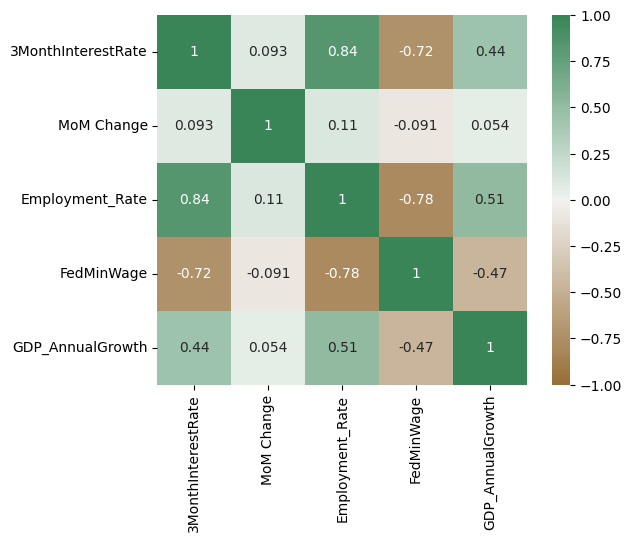

In [94]:
correlation_matrix = X.corr()
axis_corr = sns.heatmap(
    correlation_matrix,
    vmin = -1, vmax = 1, center = 0,
    cmap = sns.diverging_palette(50, 500, n = 500),
    annot = True,
    square = True
)
# plt.show()

                    FedMinWage  MoM Change  3MonthInterestRate  \
FedMinWage            1.000000   -0.083761           -0.721743   
MoM Change           -0.083761    1.000000            0.084765   
3MonthInterestRate   -0.721743    0.084765            1.000000   
GDP_AnnualGrowth     -0.465913    0.030569            0.434616   

                    GDP_AnnualGrowth  
FedMinWage                 -0.465913  
MoM Change                  0.030569  
3MonthInterestRate          0.434616  
GDP_AnnualGrowth            1.000000  


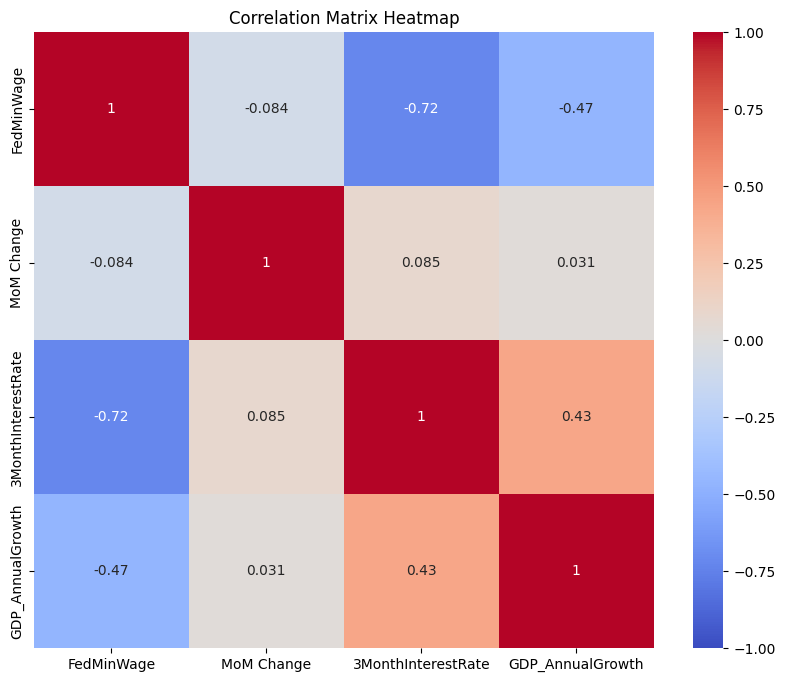

Variance Inflation Factors:
              Feature       VIF
0          FedMinWage  2.177836
1          MoM Change  1.253113
2  3MonthInterestRate  2.450560
3    GDP_AnnualGrowth  2.670900


In [76]:
# Implement heatmap for correlation matrix. expand on number of variables in matrix. Expand vif for all variables
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# change datatypes to comply with heatmap
df = pd.read_csv("finalData.csv")
df['FedMinWage'] = df['FedMinWage'].str.replace('$', '').astype(float)
df['3MonthInterestRate'] = pd.to_numeric(df['3MonthInterestRate'], errors = 'coerce')
df['GDP_AnnualGrowth'] = df['GDP_AnnualGrowth'].str.replace('%', '').astype(float) / 100
# print(df.columns)
columns_of_interest = ['FedMinWage', 'MoM Change', '3MonthInterestRate', 'GDP_AnnualGrowth']

# drop nas to run corr heat map
var_used = df[columns_of_interest].dropna()
# print(var_used.dtypes)
matrix = var_used.corr()
print(matrix)

# plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

# vif
X = var_used
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("Variance Inflation Factors:")
print(vif_data)



In [ ]:

# Filter y variable
Y = data['Overall.12']
Y_filtered = Y[(data['Date'] >= '1998-01-01') & (data['Date'] <= '2020-12-01')]

# Filter X variables
X = data[['3MonthInterestRate', 'FedMinWage', 'GDP_AnnualGrowth']]
X_filtered = X[(data['Date'] >= '1998-01-01') & (data['Date'] <= '2020-12-01')]

# Reset indices to align
Y_filtered = Y_filtered.reset_index(drop=True)
X_filtered = X_filtered.reset_index(drop=True)

# Add constant to X
X_filtered = sm.add_constant(X_filtered)

# Create the OLS model
est = sm.OLS(Y_filtered, X_filtered.astype(float)).fit()

# Print the summary of the regression results
print(est.summary())



                            OLS Regression Results                            
Dep. Variable:             Overall.12   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     247.4
Date:                Sun, 26 May 2024   Prob (F-statistic):           2.09e-77
Time:                        19:44:53   Log-Likelihood:                -209.75
No. Observations:                 276   AIC:                             427.5
Df Residuals:                     272   BIC:                             442.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.3321      0

In [ ]:
# Filter y variable
Y_filtered = Y[(data['Date'] >= '1998-01-01') & (data['Date'] <= '2020-12-01')]

# Filter X variables
X_filtered = X[(data['Date'] >= '1998-01-01') & (data['Date'] <= '2020-12-01')]

# Reset indices to align
Y_filtered = Y_filtered.reset_index(drop=True)
X_filtered = X_filtered.reset_index(drop=True)

# Add constant to X
X_filtered = sm.add_constant(X_filtered)

# Create the OLS model
est = sm.OLS(Y_filtered, X_filtered.astype(float)).fit()

# Print the summary of the regression results
print(est.summary())


                            OLS Regression Results                            
Dep. Variable:             Overall.12   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     247.4
Date:                Sun, 26 May 2024   Prob (F-statistic):           2.09e-77
Time:                        19:44:53   Log-Likelihood:                -209.75
No. Observations:                 276   AIC:                             427.5
Df Residuals:                     272   BIC:                             442.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.3321      0

In [ ]:
Y = data['Paid Hourly'].dropna()
Y = Y[(data['Date'] >= '1998-01-01') & (data['Date'] <= '2020-12-01')]
# Define the independent variables, add a constant term to the predictors
X = data[['3MonthInterestRate', 'MoM Change', 'FedMinWage', 'GDP_AnnualGrowth']]
X = X.dropna(subset=['3MonthInterestRate', 'MoM Change',  'FedMinWage', 'GDP_AnnualGrowth'])
X = sm.add_constant(X)

# Create the OLS model
est = sm.OLS(Y, X.astype(float)).fit()

print(est.summary())



                            OLS Regression Results                            
Dep. Variable:            Paid Hourly   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     217.6
Date:                Sun, 26 May 2024   Prob (F-statistic):           2.52e-83
Time:                        19:44:53   Log-Likelihood:                -184.62
No. Observations:                 276   AIC:                             379.2
Df Residuals:                     271   BIC:                             397.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.3440      0

In [ ]:
# figuring out what datatypes are listed as for error managment
column_types = data[['3MonthInterestRate', 'MoM Change', 'Employment_Rate', 'FedMinWage', 'GDP_AnnualGrowth', 'Overall.12']].dtypes
print(column_types)


3MonthInterestRate    float64
MoM Change            float64
Employment_Rate       float64
FedMinWage            float64
GDP_AnnualGrowth      float64
Overall.12            float64
dtype: object


In [ ]:
column_types = data[['PresParty', 'SenParty', 'HouseParty', 'Overall.12']].dtypes
print(column_types)

PresParty      object
SenParty       object
HouseParty     object
Overall.12    float64
dtype: object


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Convert categorical variables to numeric using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['PresParty', 'SenParty', 'HouseParty'], drop_first=True)

print(data_encoded.head())
column_types = data[['PresParty', 'SenParty', 'HouseParty', 'Overall.12']].dtypes
print(column_types)

         Date  High school of less  Associates degree  \
0  1977-01-01                  NaN                NaN   
1  1977-02-01                  NaN                NaN   
2  1977-03-01                  NaN                NaN   
3  1977-04-01                  NaN                NaN   
4  1977-05-01                  NaN                NaN   

   Bachelors degree or higher  Overall  16-24  25-54  55+  Overall.1  Male  \
0                         NaN      NaN    NaN    NaN  NaN        NaN   NaN   
1                         NaN      NaN    NaN    NaN  NaN        NaN   NaN   
2                         NaN      NaN    NaN    NaN  NaN        NaN   NaN   
3                         NaN      NaN    NaN    NaN  NaN        NaN   NaN   
4                         NaN      NaN    NaN    NaN  NaN        NaN   NaN   

   ...  3MonthInterestRate  MoM Change  Employment_Rate  TrifectaFlag  \
0  ...                 NaN         NaN         64.58551      Democrat   
1  ...                 NaN         NaN    

In [ ]:
# Filter data based on the date range
filtered_data = pd.read_csv('finalData.csv')

def map_party(party):
    if party == 'Democrat':
        return 0
    elif party == 'Republican':
        return 1
    else:
        return np.nan

# Apply the mapping function to the party columns
filtered_data['PresParty'] = filtered_data['PresParty'].apply(map_party)
filtered_data['SenParty'] = filtered_data['SenParty'].apply(map_party)
filtered_data['HouseParty'] = filtered_data['HouseParty'].apply(map_party)

# Drop rows with NA values
filtered_data = filtered_data.dropna(subset=['PresParty', 'SenParty', 'HouseParty','Overall.12'])

# Separate the dependent variable (Y) and independent variables (X)
Y_filtered = filtered_data['Overall.12']
X_filtered = filtered_data[['PresParty', 'SenParty', 'HouseParty']]

# Add a constant term to the predictors
X_filtered = sm.add_constant(X_filtered)

# Fit the OLS regression model
ols_model = sm.OLS(Y_filtered, X_filtered).fit()

# Print the summary of the regression results
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:             Overall.12   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     25.12
Date:                Sun, 26 May 2024   Prob (F-statistic):           2.24e-14
Time:                        19:44:53   Log-Likelihood:                -357.62
No. Observations:                 276   AIC:                             723.2
Df Residuals:                     272   BIC:                             737.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7678      0.129     21.470      0.0

In [ ]:
# Save the final merged DataFrame to a new CSV file
filtered_data.to_csv('AAAAParty.csv', index=False)


In [ ]:
# Filter data based on the date range
#Converting datatypes to float to work with OLS 


data = pd.read_csv('finalData.csv')

# Convert the '3MonthInterestRate' column to string type
data['3MonthInterestRate'] = data['3MonthInterestRate'].astype(str)

# Remove decimal points only when there is no number before or after it
data['3MonthInterestRate'] = data['3MonthInterestRate'].str.replace(r'(?<!\d)\.|\.(?!\d)', '', regex=True)

# Replace blanks with '0'
data['3MonthInterestRate'] = data['3MonthInterestRate'].replace('', '0')

# Convert the column to float
data['3MonthInterestRate'] = data['3MonthInterestRate'].astype(float)

# Correctly remove dollar signs from 'FedMinWage' and convert to float
data['FedMinWage'] = data['FedMinWage'].str.replace('$', '').astype(float)

# Correctly remove percent signs from 'GDP_AnnualGrowth', convert to float, and adjust for percentage representation
data['GDP_AnnualGrowth'] = data['GDP_AnnualGrowth'].str.replace('%', '').astype(float) / 100


def map_party(party):
    if party == 'Democrat':
        return 0
    elif party == 'Republican':
        return 1
    else:
        return np.nan

# Apply the mapping function to the party columns
data['PresParty'] = data['PresParty'].apply(map_party)
data['SenParty'] = data['SenParty'].apply(map_party)
data['HouseParty'] = data['HouseParty'].apply(map_party)

# Drop rows with NA values
data = data.dropna(subset=['PresParty', 'SenParty', 'HouseParty','Overall.12','3MonthInterestRate', 'MoM Change', 'Employment_Rate', 'FedMinWage', 'GDP_AnnualGrowth'])

# Separate the dependent variable (Y) and independent variables (X)
Y_filtered = data['Overall.12']
X_filtered = data[['PresParty', 'SenParty', 'HouseParty', '3MonthInterestRate', 'MoM Change', 'FedMinWage', 'GDP_AnnualGrowth']]

# Add a constant term to the predictors
X_filtered = sm.add_constant(X_filtered)

# Fit the OLS regression model
ols_model = sm.OLS(Y_filtered, X_filtered).fit()

# Print the summary of the regression results
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:             Overall.12   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     136.1
Date:                Sun, 26 May 2024   Prob (F-statistic):           1.98e-84
Time:                        19:44:53   Log-Likelihood:                -182.11
No. Observations:                 276   AIC:                             380.2
Df Residuals:                     268   BIC:                             409.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.6184      0

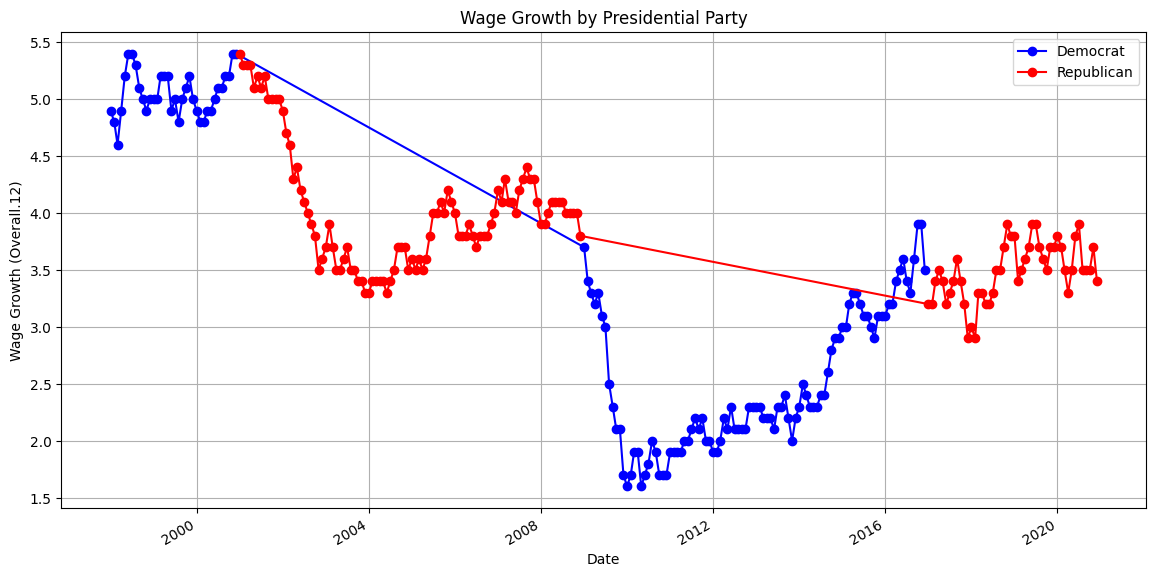

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data from CSV
data = pd.read_csv('finalData.csv')

# Verify the required columns are present in the data
required_columns = ['Overall.12', 'PresParty', 'Date']
if not all(col in data.columns for col in required_columns):
    raise ValueError(f"The input CSV file must contain the following columns: {', '.join(required_columns)}")

# Convert the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Split the data based on PresParty
democrat_df = data[data['PresParty'] == 'Democrat']
republican_df = data[data['PresParty'] == 'Republican']

# Plot the data
plt.figure(figsize=(14, 7))

# Plot Democrat data
plt.plot(democrat_df['Date'], democrat_df['Overall.12'], marker='o', linestyle='-', color='blue', label='Democrat')

# Plot Republican data
plt.plot(republican_df['Date'], republican_df['Overall.12'], marker='o', linestyle='-', color='red', label='Republican')

# Add title and labels
plt.title('Wage Growth by Presidential Party')
plt.xlabel('Date')
plt.ylabel('Wage Growth (Overall.12)')
plt.legend()
plt.grid(True)

# Format the date display on x-axis
plt.gcf().autofmt_xdate()

# Show plot
plt.show()


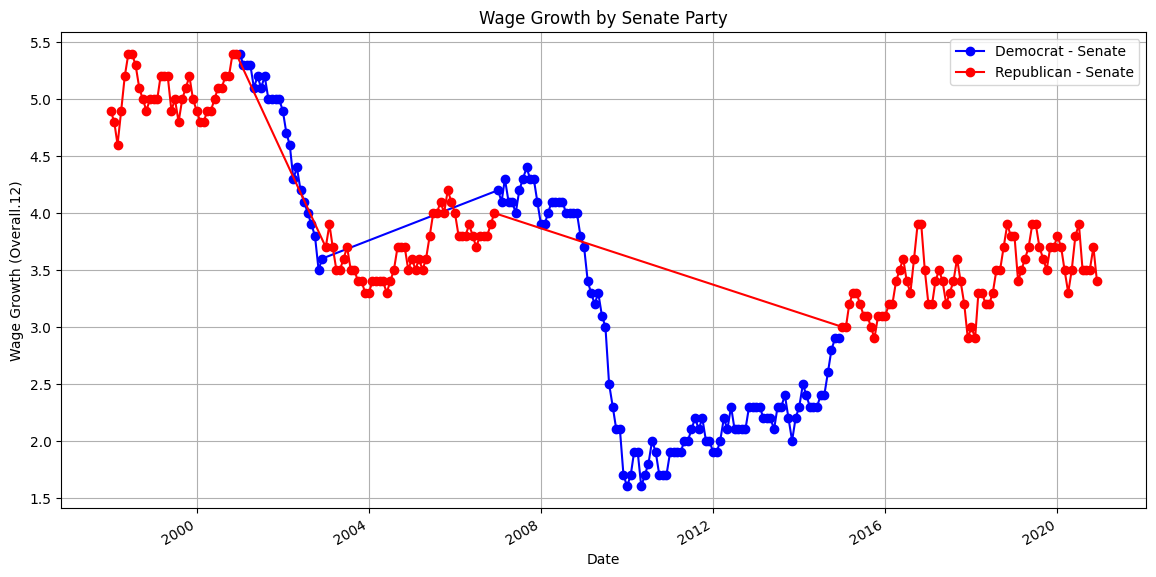

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data from CSV
data = pd.read_csv('finalData.csv')

# Verify the required columns are present in the data
required_columns = ['Overall.12', 'SenParty', 'Date']
if not all(col in data.columns for col in required_columns):
    raise ValueError(f"The input CSV file must contain the following columns: {', '.join(required_columns)}")

# Convert the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Split the data based on SenParty
democrat_df = data[data['SenParty'] == 'Democrat']
republican_df = data[data['SenParty'] == 'Republican']

# Plot the data
plt.figure(figsize=(14, 7))

# Plot Democrat data
plt.plot(democrat_df['Date'], democrat_df['Overall.12'], marker='o', linestyle='-', color='blue', label='Democrat - Senate')

# Plot Republican data
plt.plot(republican_df['Date'], republican_df['Overall.12'], marker='o', linestyle='-', color='red', label='Republican - Senate')

# Add title and labels
plt.title('Wage Growth by Senate Party')
plt.xlabel('Date')
plt.ylabel('Wage Growth (Overall.12)')
plt.legend()
plt.grid(True)

# Format the date display on x-axis
plt.gcf().autofmt_xdate()

# Show plot
plt.show()


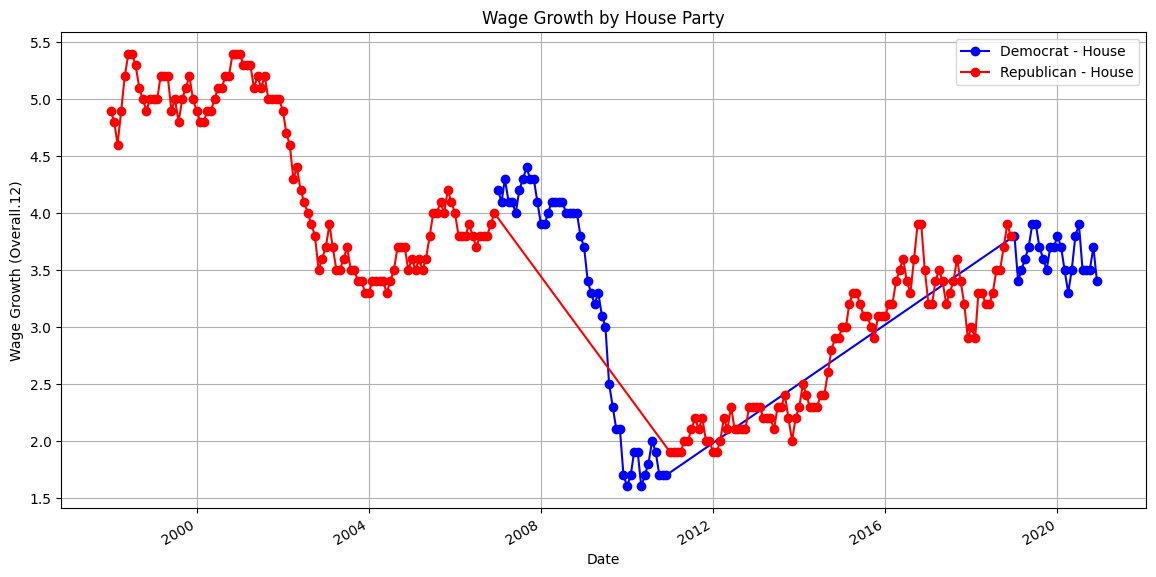

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data from CSV
data = pd.read_csv('finalData.csv')

# Verify the required columns are present in the data
required_columns = ['Overall.12', 'HouseParty', 'Date']
if not all(col in data.columns for col in required_columns):
    raise ValueError(f"The input CSV file must contain the following columns: {', '.join(required_columns)}")

# Convert the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Split the data based on HouseParty
democrat_df = data[data['HouseParty'] == 'Democrat']
republican_df = data[data['HouseParty'] == 'Republican']

# Plot the data
plt.figure(figsize=(14, 7))

# Plot Democrat data
plt.plot(democrat_df['Date'], democrat_df['Overall.12'], marker='o', linestyle='-', color='blue', label='Democrat - House')

# Plot Republican data
plt.plot(republican_df['Date'], republican_df['Overall.12'], marker='o', linestyle='-', color='red', label='Republican - House')

# Add title and labels
plt.title('Wage Growth by House Party')
plt.xlabel('Date')
plt.ylabel('Wage Growth (Overall.12)')
plt.legend()
plt.grid(True)

# Format the date display on x-axis
plt.gcf().autofmt_xdate()

# Show plot
plt.show()


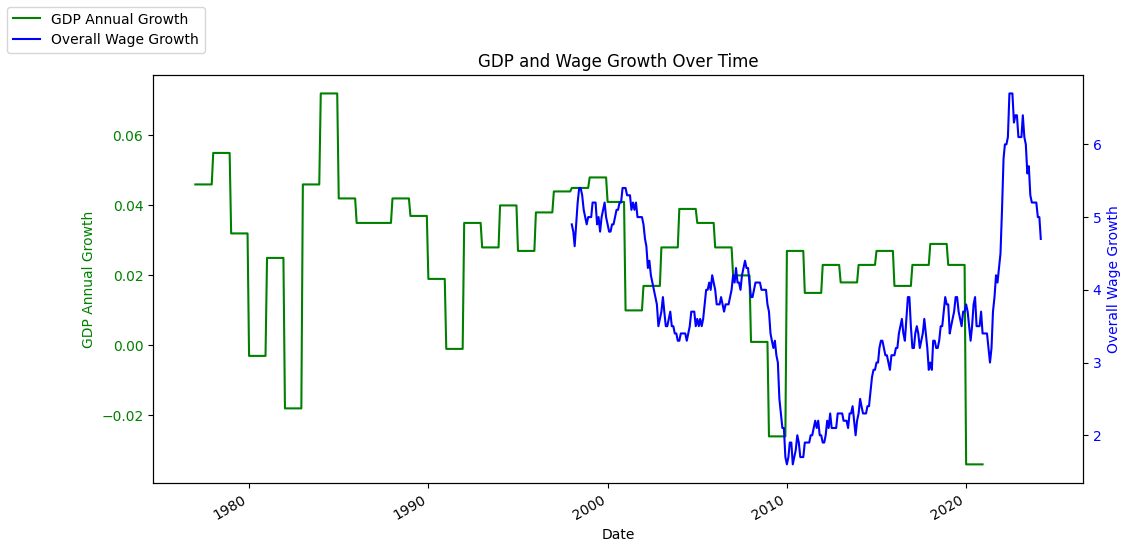

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data
data = pd.read_csv('finalData.csv')
data['Date'] = pd.to_datetime(data['Date'])  # Convert Date column to datetime format

# Correctly remove dollar signs from 'FedMinWage' and convert to float
data['FedMinWage'] = data['FedMinWage'].str.replace('$', '').astype(float)

# Correctly remove percent signs from 'GDP_AnnualGrowth', convert to float, and adjust for percentage representation
data['GDP_AnnualGrowth'] = data['GDP_AnnualGrowth'].str.replace('%', '').astype(float) / 100

# Plot setup
fig, ax1 = plt.subplots(figsize=(12, 6))

# GDP Annual Growth
ax1.plot(data['Date'], data['GDP_AnnualGrowth'], label='GDP Annual Growth', color='green')
ax1.set_xlabel('Date')
ax1.set_ylabel('GDP Annual Growth', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Overall Wage Growth on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(data['Date'], data['Overall.12'], label='Overall Wage Growth', color='blue')
ax2.set_ylabel('Overall Wage Growth', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Other configurations
plt.title('GDP and Wage Growth Over Time')
fig.autofmt_xdate()  # Auto formats the dates on the x-axis
fig.legend(loc='upper left')

# Show the plot
plt.show()


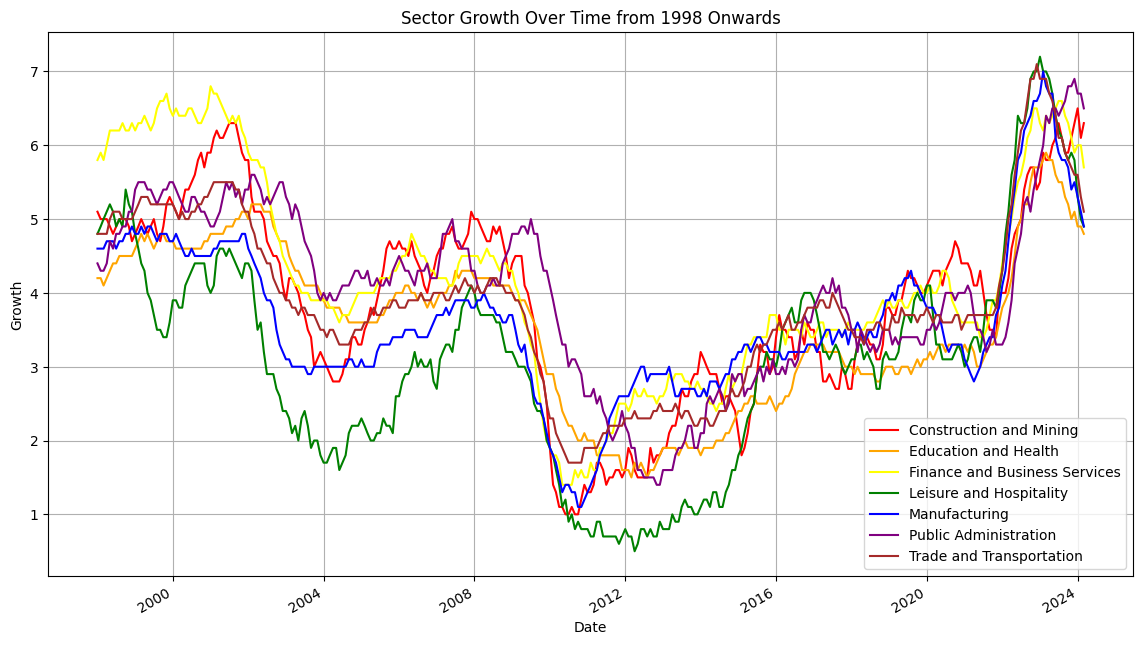

In [ ]:
data = data[data['Date'] >= '1998-01-01']

# Plot setup
plt.figure(figsize=(14, 8))

# Plotting each sector with a distinct color and label
plt.plot(data['Date'], data['Construction and mining'], label='Construction and Mining', marker='', linestyle='-', color='red')
plt.plot(data['Date'], data['Education and health'], label='Education and Health', marker='', linestyle='-', color='orange')
plt.plot(data['Date'], data['Finance and business services'], label='Finance and Business Services', marker='', linestyle='-', color='yellow')
plt.plot(data['Date'], data['Leisure and hospitality and other services'], label='Leisure and Hospitality', marker='', linestyle='-', color='green')
plt.plot(data['Date'], data['Manufacturing'], label='Manufacturing', marker='', linestyle='-', color='blue')
plt.plot(data['Date'], data['Public administration'], label='Public Administration', marker='', linestyle='-', color='purple')
plt.plot(data['Date'], data['Trade and transportation'], label='Trade and Transportation', marker='', linestyle='-', color='brown')

# Adding title and labels
plt.title('Sector Growth Over Time from 1998 Onwards')
plt.xlabel('Date')
plt.ylabel('Growth')
plt.legend()  # Shows the legend to identify which line corresponds to which sector
plt.grid(True)

# Format the date display on x-axis
plt.gcf().autofmt_xdate()

# Show plot
plt.show()

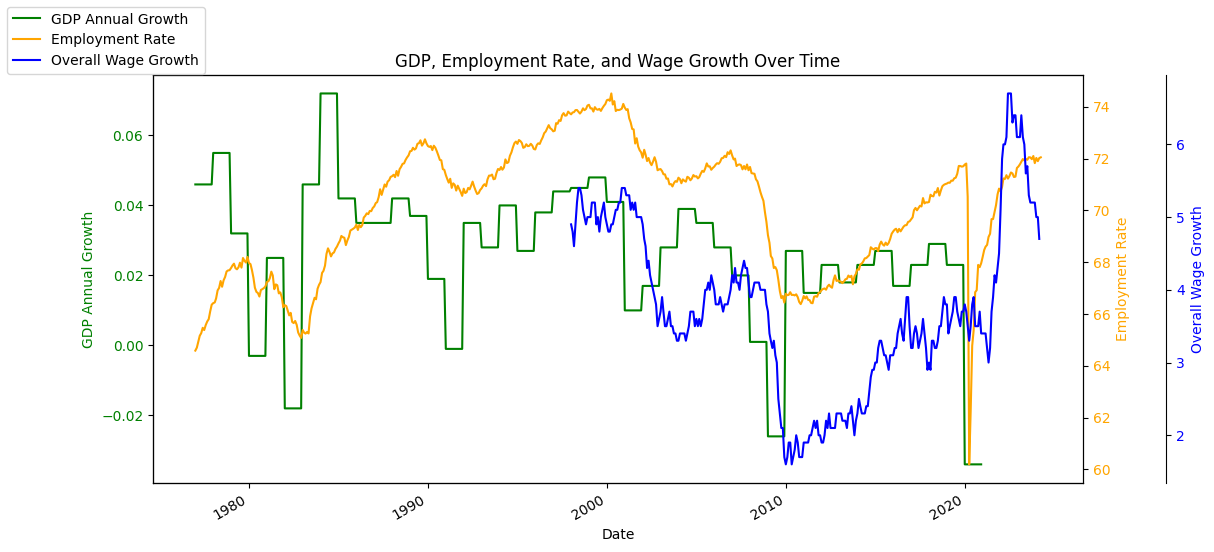

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data
data = pd.read_csv('finalData.csv')

data['Date'] = pd.to_datetime(data['Date'])

# Correctly remove dollar signs from 'FedMinWage' and convert to float
data['FedMinWage'] = data['FedMinWage'].str.replace('$', '').astype(float)

# Correctly remove percent signs from 'GDP_AnnualGrowth', convert to float, and adjust for percentage representation
data['GDP_AnnualGrowth'] = data['GDP_AnnualGrowth'].str.replace('%', '').astype(float) / 100

# Plot setup
fig, ax1 = plt.subplots(figsize=(12, 6))

# GDP Annual Growth
ax1.plot(data['Date'], data['GDP_AnnualGrowth'], label='GDP Annual Growth', color='green')
ax1.set_xlabel('Date')
ax1.set_ylabel('GDP Annual Growth', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Employment Rate on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(data['Date'], data['Employment_Rate'], label='Employment Rate', color='orange')
ax2.set_ylabel('Employment Rate', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Overall Wage Growth on tertiary y-axis
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Move the axis to make room for the new axis
ax3.plot(data['Date'], data['Overall.12'], label='Overall Wage Growth', color='blue')
ax3.set_ylabel('Overall Wage Growth', color='blue')
ax3.tick_params(axis='y', labelcolor='blue')

# Other configurations
plt.title('GDP, Employment Rate, and Wage Growth Over Time')
fig.autofmt_xdate()  # Auto formats the dates on the x-axis
fig.legend(loc='upper left')

# Show the plot
plt.show()


In [ ]:
# wage growth by sector
df = pd.read_csv("finalData.csv")
print(df.columns)

Index(['Date', 'High school of less', 'Associates degree',
       'Bachelors degree or higher', 'Overall', '16-24', '25-54', '55+',
       'Overall.1', 'Male', 'Female', 'Overall.2',
       'Professional and management', 'Service', 'OPTICS', 'Overall.3',
       'Construction and mining', 'Education and health',
       'Finance and business services',
       'Leisure and hospitality and other services', 'Manufacturing',
       'Public administration', 'Trade and transportation', 'Overall.4',
       'New England', 'Middle Atlantic', 'East North Central',
       'West North Central', 'South Atlantic', 'East South Central',
       'West South Central', 'Mountain', 'Pacific', 'Overall.5',
       'Usually Full-time', 'Usually Part-time', 'Overall.6', 'Job Stayer',
       'Job Switcher', 'Overall.7', 'MSA', 'non-MSA', 'Overall.8',
       'Lowest quartile of wage distribution',
       '2nd quartile of wage distribution',
       '3rd quartile of wage distribution',
       'Highest quartile of w